# Project 4

Kaggle Dataset: https://www.kaggle.com/datasets/jummyegg/rawg-game-dataset 

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [12]:
gi_df = pd.read_csv('game_info.csv')
gi_df

,id,slug,name,metacritic,released,tba,updated,website,rating,rating_top,...,developers,genres,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
0,1,dgeneration-hd,D/Generation HD,NaN,2015-10-23,False,2019-09-17T11:58:57,http://dgeneration.net,0.0,0,...,West Coast Software,Adventure||Puzzle,West Coast Software,Everyone 10+,4,88,2,2,0,0
1,10,g-prime,G Prime Into The Rain,NaN,2016-01-06,False,2019-11-06T23:04:19,NaN,0.0,0,...,Soma Games,Simulation||Indie,Immanitas Entertainment||Code-Monkeys,Everyone,2,42,2,0,0,0
2,100,land-sliders,Land Sliders,NaN,2015-09-24,False,2019-10-22T13:56:16,http://prettygreat.com,0.0,0,...,Prettygreat Pty,Adventure||Arcade,Prettygreat Pty,Everyone 10+,0,2,2,0,1,0
3,1000,pixel-gear,Pixel Gear,NaN,2016-10-20,False,2019-08-28T22:16:02,https://www.facebook.com/Geronimo-Interactive-...,0.0,0,...,Oasis Games||Geronimo Interactive,Action||Indie,Geronimo Interactive,Teen,0,1,0,0,0,0
4,10000,gods-and-idols,Gods and Idols,NaN,2016-12-12,False,2019-09-17T13:37:13,http://www.godsandidols.com/,0.0,1,...,Viking Tao,RPG||Strategy||Massively Multiplayer,Viking Tao,NaN,2,79,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474412,99994,holy-or-dead,Holy or Dead,NaN,2017-05-17,False,2019-01-09T12:41:06,NaN,0.0,0,...,Ralidon,NaN,NaN,NaN,0,0,0,0,0,0
474413,99995,airstrike-hd-demo,Airstrike HD Demo,NaN,2016-03-04,False,2019-01-09T12:41:06,NaN,0.0,0,...,Fifth Dimension Company,Action,NaN,NaN,0,0,0,0,0,0
474414,99997,uranias-mirror,Urania's Mirror,NaN,2016-04-25,False,2019-01-09T12:41:06,NaN,0.0,0,...,sneakthief,Adventure,NaN,NaN,0,0,0,0,0,0
474415,99998,simucities,Simucities,NaN,2017-05-26,False,2019-01-09T12:41:06,NaN,0.0,0,...,keypixels,NaN,NaN,NaN,0,0,0,0,0,0


In [13]:
gi_df.columns

Index(['id', 'slug', 'name', 'metacritic', 'released', 'tba', 'updated',
       'website', 'rating', 'rating_top', 'playtime', 'achievements_count',
       'ratings_count', 'suggestions_count', 'game_series_count',
       'reviews_count', 'platforms', 'developers', 'genres', 'publishers',
       'esrb_rating', 'added_status_yet', 'added_status_owned',
       'added_status_beaten', 'added_status_toplay', 'added_status_dropped',
       'added_status_playing'],
      dtype='object')

In [14]:
gi_df.isnull().sum()

id                           0
slug                         2
name                         3
metacritic              469684
released                 24199
tba                          0
updated                      0
website                 409376
rating                       0
rating_top                   0
playtime                     0
achievements_count           0
ratings_count                0
suggestions_count            0
game_series_count            0
reviews_count                0
platforms                 3986
developers                8366
genres                  103185
publishers              333401
esrb_rating             418553
added_status_yet             0
added_status_owned           0
added_status_beaten          0
added_status_toplay          0
added_status_dropped         0
added_status_playing         0
dtype: int64

In [15]:
gi_df = gi_df.drop(columns=['id', 'slug', 'name', 'website', 'updated', 'tba', 'game_series_count', 'added_status_yet', 'added_status_owned', 'added_status_beaten', 'added_status_toplay', 'added_status_dropped', 'added_status_playing', 'metacritic', 'released', 'genres', 'publishers', 'esrb_rating'])

gi_df

,rating,rating_top,playtime,achievements_count,ratings_count,suggestions_count,reviews_count,platforms,developers
0,0.0,0,1,80,2,292,4,PC||macOS||Xbox One||PlayStation 4||Nintendo S...,West Coast Software
1,0.0,0,0,26,3,389,3,macOS||PC||Xbox One,Soma Games
2,0.0,0,0,0,2,83,2,iOS,Prettygreat Pty
3,0.0,0,0,0,0,455,0,PC||PlayStation 4,Oasis Games||Geronimo Interactive
4,0.0,1,1,0,5,262,5,PC,Viking Tao
...,...,...,...,...,...,...,...,...,...
474412,0.0,0,0,0,0,52,0,PC,Ralidon
474413,0.0,0,0,0,0,202,0,PC,Fifth Dimension Company
474414,0.0,0,0,0,0,51,0,PC,sneakthief
474415,0.0,0,0,0,0,84,0,PC,keypixels


In [16]:
gi_df.isnull().sum()

rating                   0
rating_top               0
playtime                 0
achievements_count       0
ratings_count            0
suggestions_count        0
reviews_count            0
platforms             3986
developers            8366
dtype: int64

In [17]:
gi_df = gi_df.dropna(inplace=False)
gi_df.isnull().sum()

rating                0
rating_top            0
playtime              0
achievements_count    0
ratings_count         0
suggestions_count     0
reviews_count         0
platforms             0
developers            0
dtype: int64

c:\Users\jayad\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Silhouette Score: 0.480


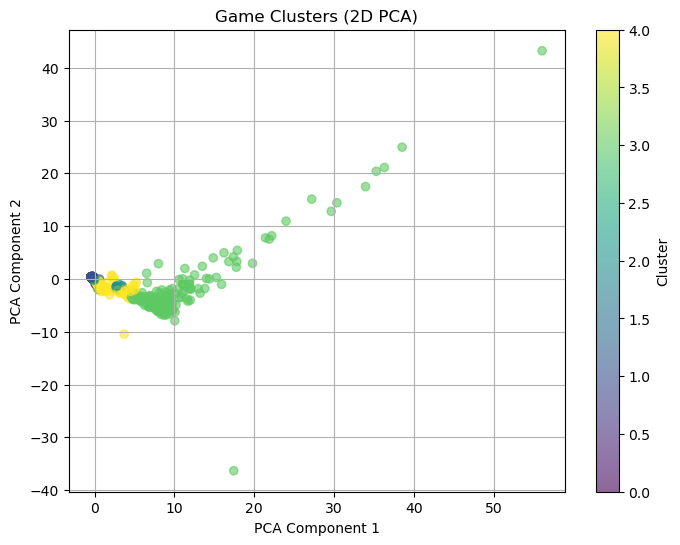

In [18]:
gi_df = gi_df.sample(n=10000, random_state=42).copy()  # Use .copy() to avoid SettingWithCopyWarning

# Select relevant features
features = [
    'rating', 'rating_top', 'playtime', 'achievements_count',
    'ratings_count', 'suggestions_count', 'reviews_count'
]

X = gi_df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions with PCA
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

# Apply MiniBatchKMeans for faster clustering
kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=1000)
labels = kmeans.fit_predict(X_pca)

# Add cluster labels to DataFrame
gi_df['cluster'] = labels

# Evaluate clustering
score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {score:.3f}")

# Visualize clusters (2D PCA)
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('Game Clusters (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
